In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from census import Census
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Import from local modules
from config import *
from main import run_pipeline

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


STARTING DATA PROCESSING PIPELINE
Libraries imported and configured
STEP 1: LOADING DATA
Loading Zillow home value data...
Zillow data loaded: 3073 counties, 319 columns
Zillow data sample:
           RegionName State     2022-12-31
0  Los Angeles County    CA  833072.424114
1         Cook County    IL  285099.310437
2       Harris County    TX  287335.925011
3     Maricopa County    AZ  474693.181722
4    San Diego County    CA  845985.821592
Loading BLS unemployment data...
BLS data loaded: 3221 counties
BLS data sample:
    FIPS          CountyName  UnemploymentRate  LaborForce
0  01001  Autauga County, AL               2.2         NaN
1  01003  Baldwin County, AL               2.2         NaN
2  01005  Barbour County, AL               3.6         NaN
3  01007     Bibb County, AL               2.4         NaN
4  01009   Blount County, AL               2.1         NaN
Loading Census economic data...
Loading Census education data...
Census data merged: 3222 counties
Census data sample

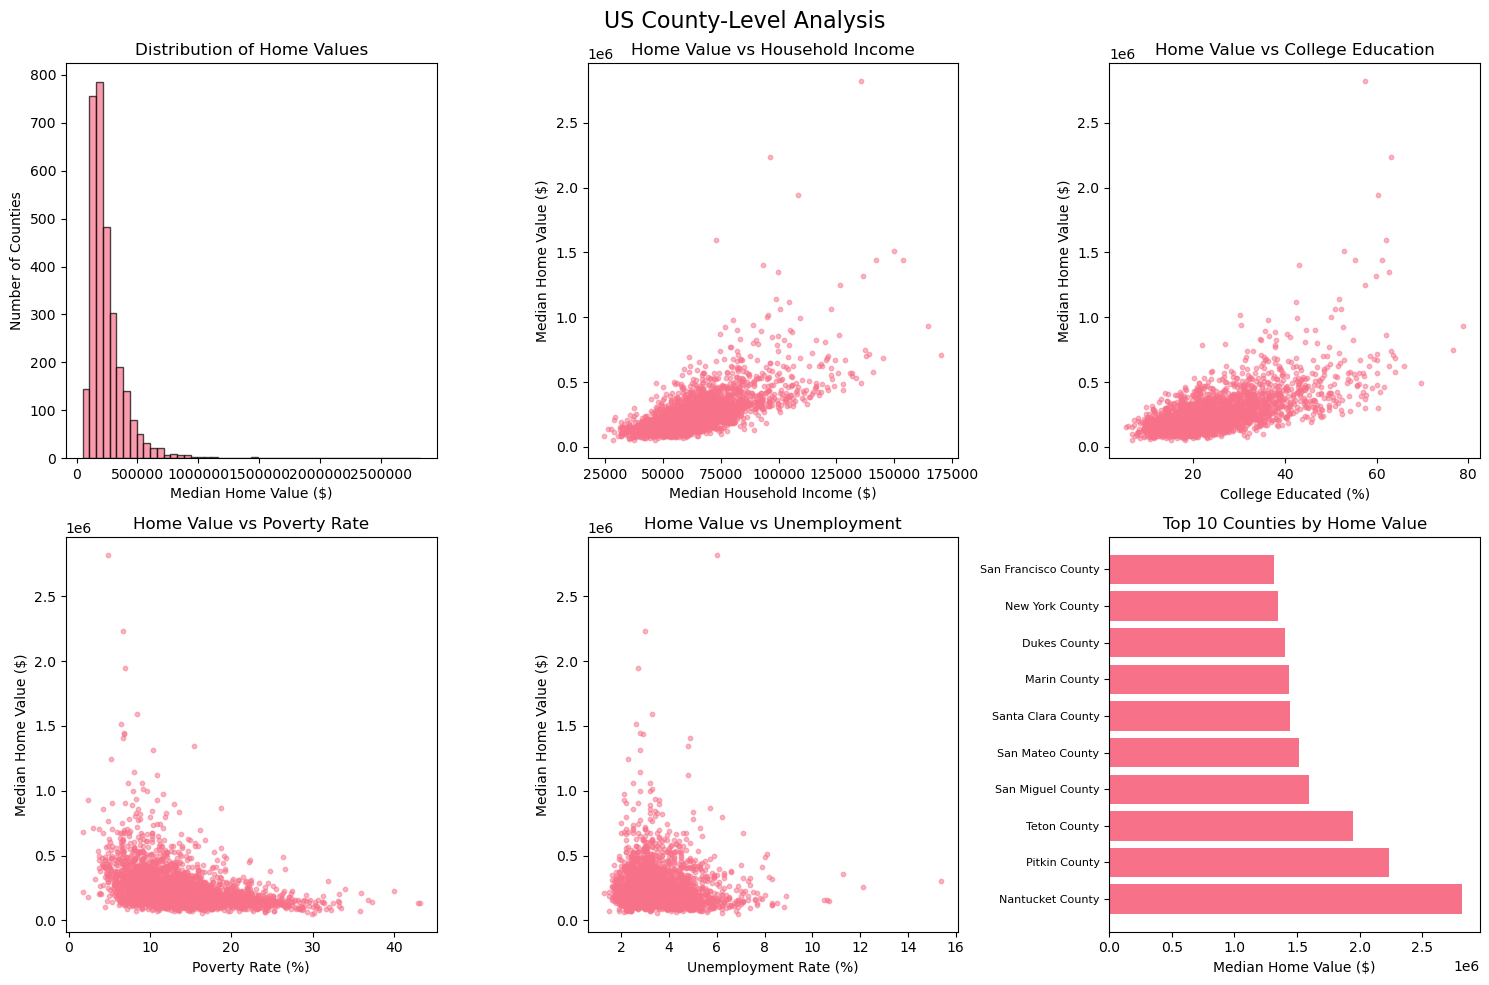

Visualizations saved to 'county_analysis_visualizations.png'
CORRELATION ANALYSIS
Correlation matrix:
                      MedianHomeValue  Median_Income  Poverty_Rate  \
MedianHomeValue              1.000000       0.663318     -0.384193   
Median_Income                0.663318       1.000000     -0.735726   
Poverty_Rate                -0.384193      -0.735726      1.000000   
College_Educated_Pct         0.652184       0.716305     -0.456279   
UnemploymentRate            -0.103418      -0.333583      0.431078   

                      College_Educated_Pct  UnemploymentRate  
MedianHomeValue                   0.652184         -0.103418  
Median_Income                     0.716305         -0.333583  
Poverty_Rate                     -0.456279          0.431078  
College_Educated_Pct              1.000000         -0.293308  
UnemploymentRate                 -0.293308          1.000000  
Top correlations with Median Home Value:
Median_Income: 0.663
College_Educated_Pct: 0.652
Unemploym

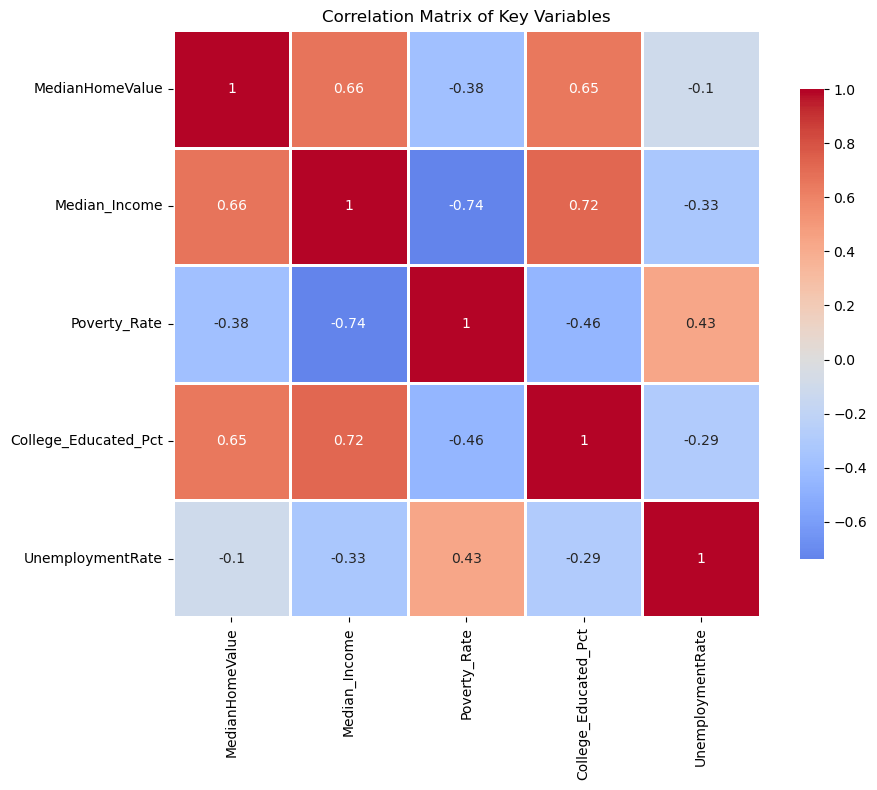

Correlation matrix saved to 'correlation_matrix.png'
STATE-LEVEL ANALYSIS
Top 10 states by average home value:
       MedianHomeValue  CountyCount
State                              
HI       846102.908463            4
MA       738920.194730           14
DC       625710.218035            1
CA       602576.160595           58
RI       494312.234008            5
CO       486220.554648           62
UT       465465.570768           26
NJ       447485.424457           21
WA       444770.179668           39
ID       405352.826465           43
Bottom 10 states by average home value:
       MedianHomeValue  CountyCount
State                              
LA       185268.850622           62
AL       181158.678247           67
IA       178973.077375           99
KY       167968.926965          120
AR       157180.412766           74
MS       157026.788844           80
OK       152924.174896           77
IL       148982.875635          102
KS       143179.644587          105
WV       142272.46886

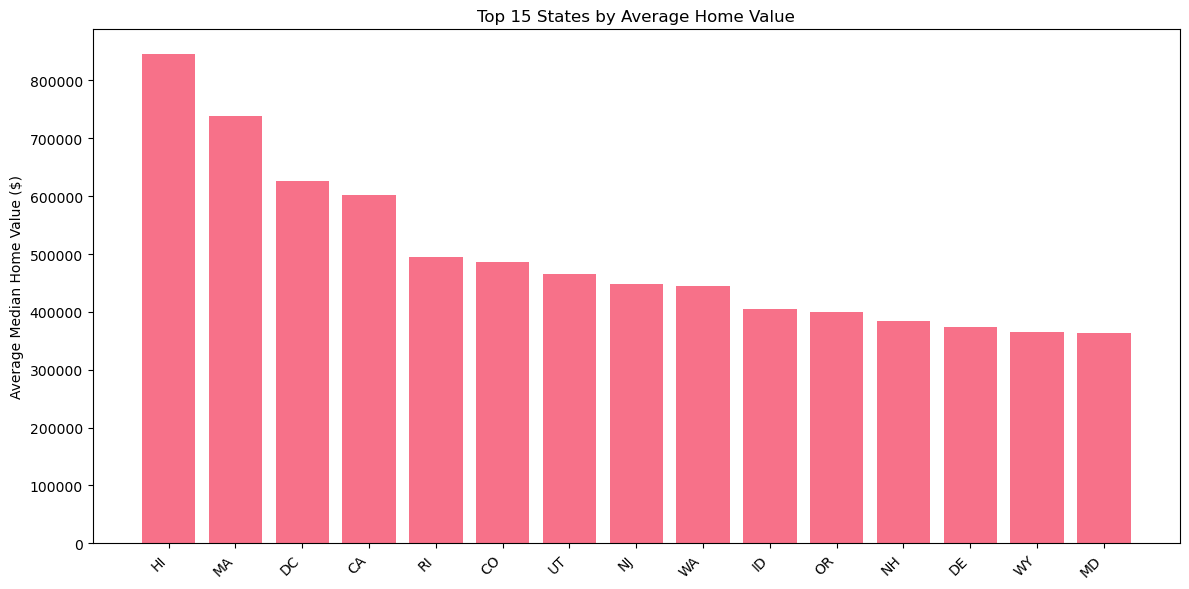

State-level analysis saved to 'state_level_analysis.png'
SAVING ANALYSIS RESULTS
Final dataset saved to 'final_merged_data.csv'
Descriptive statistics saved to 'descriptive_statistics.csv'
Correlation matrix saved to 'correlation_matrix.csv'
State-level statistics saved to 'state_level_statistics.csv'
Analysis summary saved to 'analysis_summary.txt'
Analysis complete. Check generated files for results.
Analysis completed successfully
PIPELINE COMPLETED SUCCESSFULLY


In [6]:
merged_data = run_pipeline()

## DATA DISTRIBUTION VISUALIZATIONS
Calculate and display basic descriptive statistics.

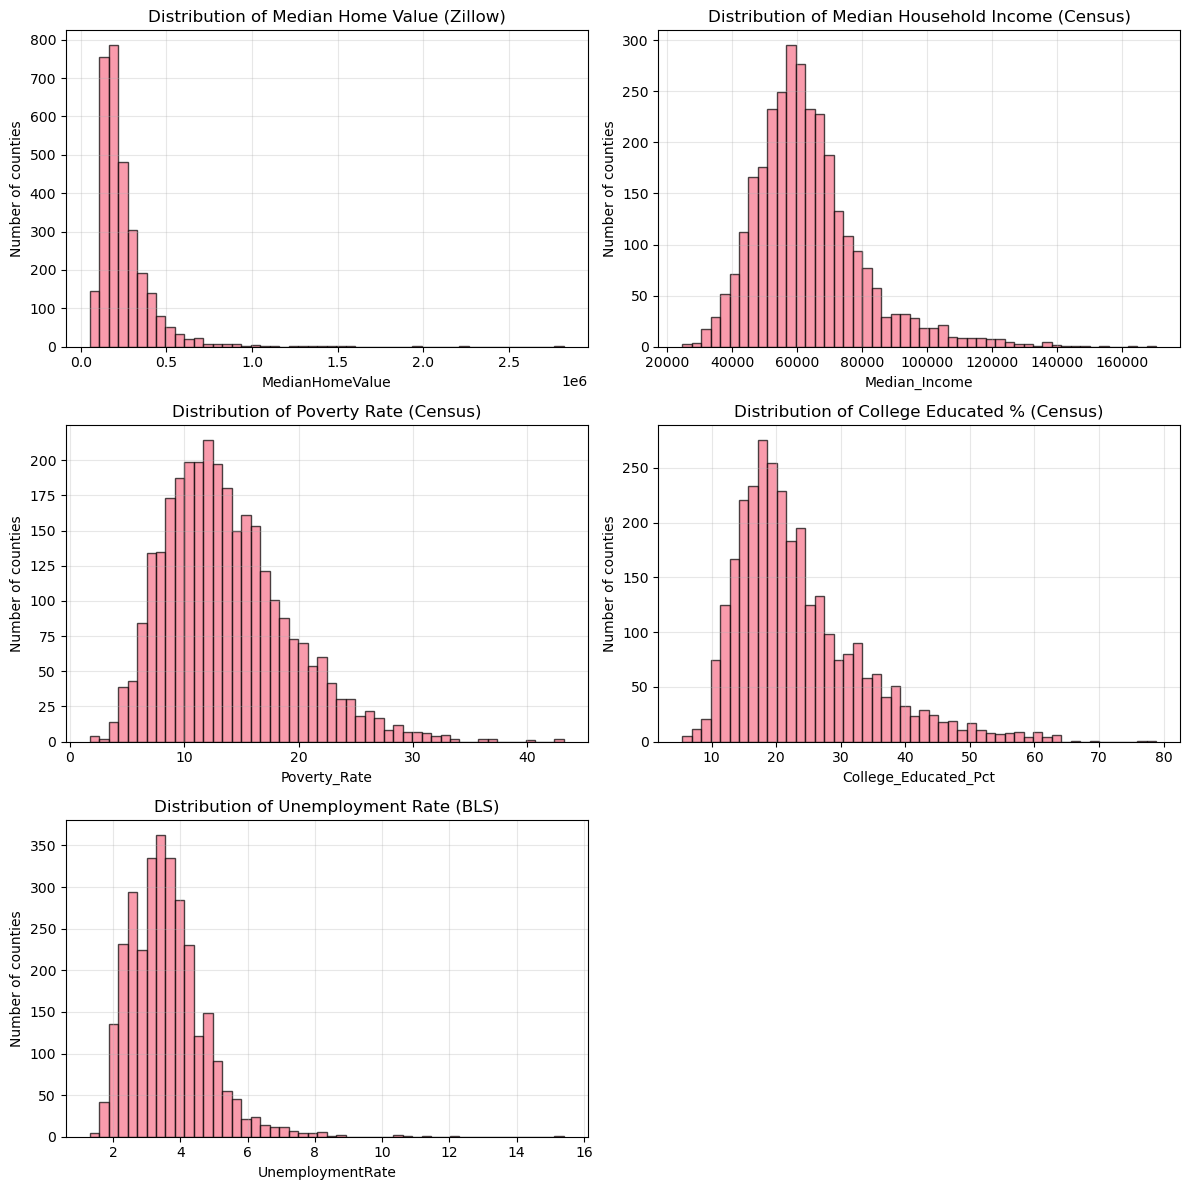

In [7]:
available_vars = ["MedianHomeValue"]
available_vars.append("Median_Income")
available_vars.append("Poverty_Rate")
available_vars.append("College_Educated_Pct")
available_vars.append("UnemploymentRate")

n_vars = len(available_vars)
n_cols = 2
n_rows = int(np.ceil(n_vars / n_cols))

plt.figure(figsize=(12, 4 * n_rows))

titles = {
    "MedianHomeValue": "Median Home Value (Zillow)",
    "Median_Income": "Median Household Income (Census)",
    "Poverty_Rate": "Poverty Rate (Census)",
    "College_Educated_Pct": "College Educated % (Census)",
    "UnemploymentRate": "Unemployment Rate (BLS)",
}

for i, var in enumerate(available_vars):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(merged_data[var].dropna(), bins=50, alpha=0.7, edgecolor="black")
    plt.title(f"Distribution of {titles[var]}")
    plt.xlabel(var)
    plt.ylabel("Number of counties")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## CORRELATION ANALYSIS
Calculating correlations between key variables.

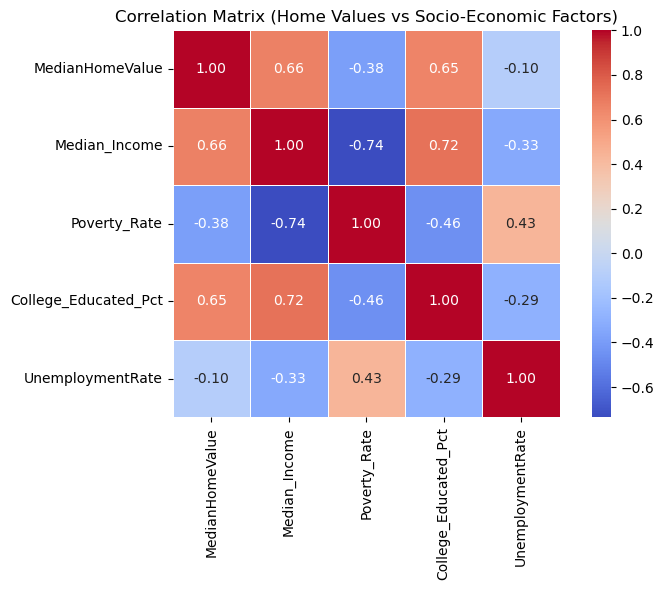


 CORRELATIONS WITH MEDIAN HOME VALUE:
  Median_Income: 0.663 (MODERATE positive correlation)
  College_Educated_Pct: 0.652 (MODERATE positive correlation)
  UnemploymentRate: -0.103 (WEAK negative correlation)
  Poverty_Rate: -0.384 (WEAK negative correlation)


In [8]:
corr_vars = ["MedianHomeValue"]
corr_vars.append("Median_Income")
corr_vars.append("Poverty_Rate")
corr_vars.append("College_Educated_Pct")
corr_vars.append("UnemploymentRate")

correlation_matrix = merged_data[corr_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
)
plt.title("Correlation Matrix (Home Values vs Socio-Economic Factors)")
plt.tight_layout()
plt.show()

home_value_corrs = correlation_matrix["MedianHomeValue"].sort_values(ascending=False)
print("\n CORRELATIONS WITH MEDIAN HOME VALUE:")
print("=" * 50)
for factor, corr in home_value_corrs.items():
    if factor == "MedianHomeValue":
        continue
    strength = "STRONG" if abs(corr) > 0.7 else "MODERATE" if abs(corr) > 0.5 else "WEAK"
    direction = "positive" if corr > 0 else "negative"
    print(f"  {factor}: {corr:.3f} ({strength} {direction} correlation)")


# K-means clustering
K-means clustering reveals distinct groups of counties with similar combinations of home values, income, poverty, education, and unemployment.

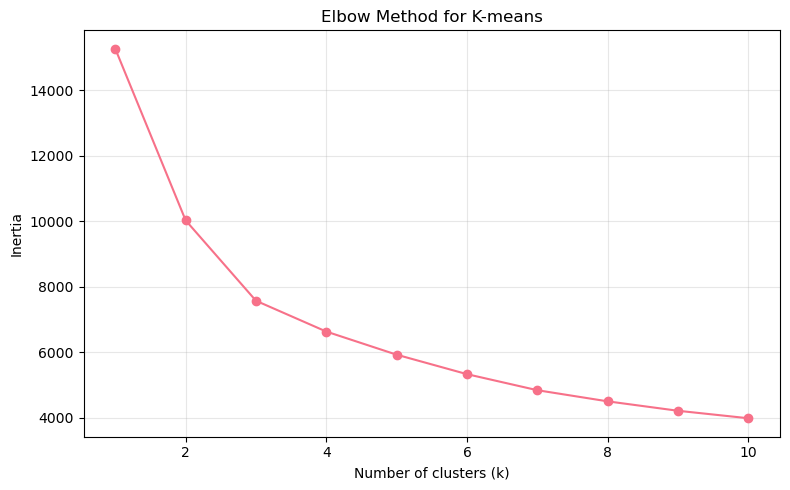

 Applied K-means clustering with k = 4
Cluster distribution:
Cluster
0     898
1    1308
2     212
3     634
Name: count, dtype: int64

 Cluster median profiles:
         MedianHomeValue  Median_Income  Poverty_Rate  College_Educated_Pct  \
Cluster                                                                       
0          291681.172571        71869.5      9.591723             28.767078   
1          178935.115242        58388.0     13.486336             18.862782   
2          545471.741044       100366.0      6.972362             44.593551   
3          149937.452975        46728.0     20.639211             15.240386   

         UnemploymentRate  
Cluster                    
0                     3.0  
1                     3.4  
2                     3.0  
3                     4.6  


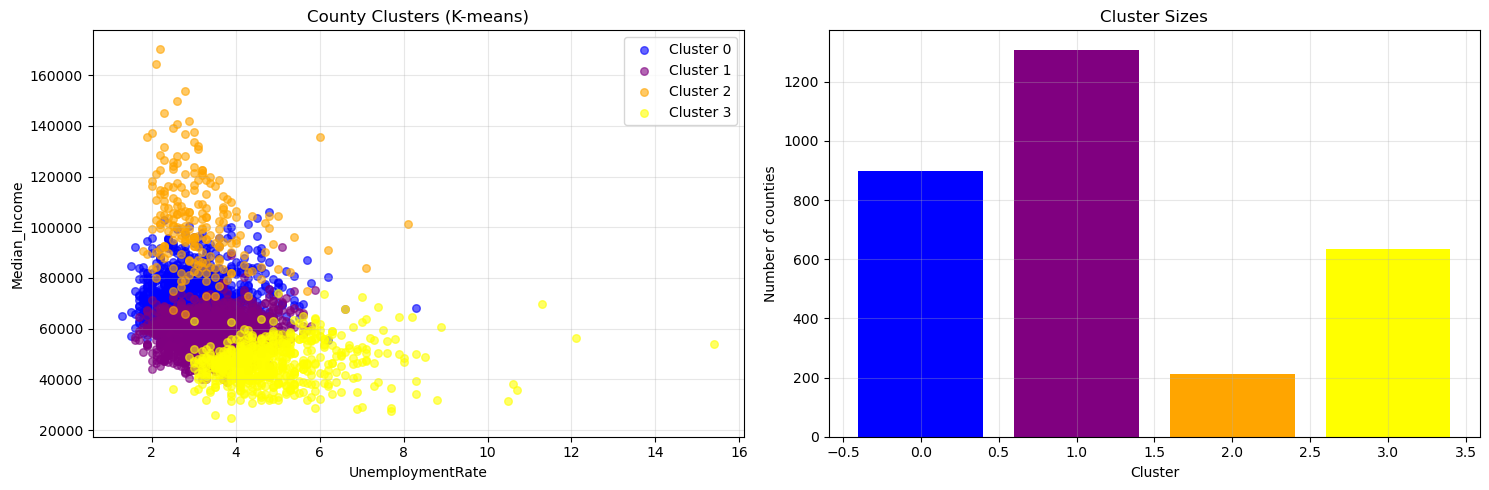


 CLUSTER INTERPRETATION (median values):

CLUSTER 0:
  Counties: 898
  Median home value: $291,681
  Median income: $71,870
  Poverty rate: 9.6%
  College educated: 28.8%
  Unemployment: 3.0%

CLUSTER 1:
  Counties: 1308
  Median home value: $178,935
  Median income: $58,388
  Poverty rate: 13.5%
  College educated: 18.9%
  Unemployment: 3.4%

CLUSTER 2:
  Counties: 212
  Median home value: $545,472
  Median income: $100,366
  Poverty rate: 7.0%
  College educated: 44.6%
  Unemployment: 3.0%

CLUSTER 3:
  Counties: 634
  Median home value: $149,937
  Median income: $46,728
  Poverty rate: 20.6%
  College educated: 15.2%
  Unemployment: 4.6%


In [9]:
features_for_clustering = ["MedianHomeValue"]
features_for_clustering.append("Median_Income")
features_for_clustering.append("Poverty_Rate")
features_for_clustering.append("College_Educated_Pct")
features_for_clustering.append("UnemploymentRate")

features_for_clustering = list(dict.fromkeys(features_for_clustering))  # remove duplicates

X = merged_data[features_for_clustering].copy().dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-means")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

merged_data_clustered = merged_data.loc[X.index].copy()
merged_data_clustered["Cluster"] = clusters

print(f" Applied K-means clustering with k = {optimal_clusters}")
cluster_dist = merged_data_clustered["Cluster"].value_counts().sort_index()
print("Cluster distribution:")
print(cluster_dist)

cluster_profile = merged_data_clustered.groupby("Cluster")[features_for_clustering].median()
print("\n Cluster median profiles:")
print(cluster_profile)

# Simple 2D visualization
plt.figure(figsize=(15, 5))

x_var, y_var = "UnemploymentRate", "Median_Income"

plt.subplot(1, 2, 1)
colors = ["blue", "purple", "orange", "yellow"]
for c_ in range(optimal_clusters):
    subset = merged_data_clustered[merged_data_clustered["Cluster"] == c_]
    plt.scatter(
        subset[x_var],
        subset[y_var],
        alpha=0.6,
        s=30,
        label=f"Cluster {c_}",
        color=colors[c_ % len(colors)],
    )
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title("County Clusters (K-means)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(cluster_dist.index, cluster_dist.values, color=colors[: len(cluster_dist)])
plt.xlabel("Cluster")
plt.ylabel("Number of counties")
plt.title("Cluster Sizes")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n CLUSTER INTERPRETATION (median values):")
for c_ in range(optimal_clusters):
    subset = merged_data_clustered[merged_data_clustered["Cluster"] == c_]
    print(f"\nCLUSTER {c_}:")
    print(f"  Counties: {len(subset)}")
    print(f"  Median home value: ${subset['MedianHomeValue'].median():,.0f}")
    print(f"  Median income: ${subset['Median_Income'].median():,.0f}")
    print(f"  Poverty rate: {subset['Poverty_Rate'].median():.1f}%")
    print(
        f"  College educated: {subset['College_Educated_Pct'].median():.1f}%"
    )
    print(
        f"  Unemployment: {subset['UnemploymentRate'].median():.1f}%"
    )



# COUNTY-LEVEL MAPS (PLOTLY CHOROPLETH)

In [10]:
import plotly.express as px

merged_data["FIPS"] = merged_data["FIPS"].astype(str).str.zfill(5)

if "merged_data_clustered" in globals() and merged_data_clustered is not None:
    merged_data_clustered["FIPS"] = merged_data_clustered["FIPS"].astype(str).str.zfill(5)

    fig2 = px.choropleth(
        merged_data_clustered,
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations="FIPS",
        color="Cluster",
        scope="usa",
        hover_name="County",
        hover_data={
            "State": True,
            "MedianHomeValue": ":$,.0f",
            "Median_Income": ":$,.0f",
            "Poverty_Rate": ":.1f",
            "College_Educated_Pct": ":.1f",
        },
    )
    fig2.update_layout(
        title_text="County Clusters: Housing & Socio-Economic Profiles",
        margin={"r": 0, "t": 40, "l": 0, "b": 0},
    )
    fig2.show()
else:
    print("No clustered dataset available for cluster map.")


## FEATURE IMPORTANCE (Random Forest)

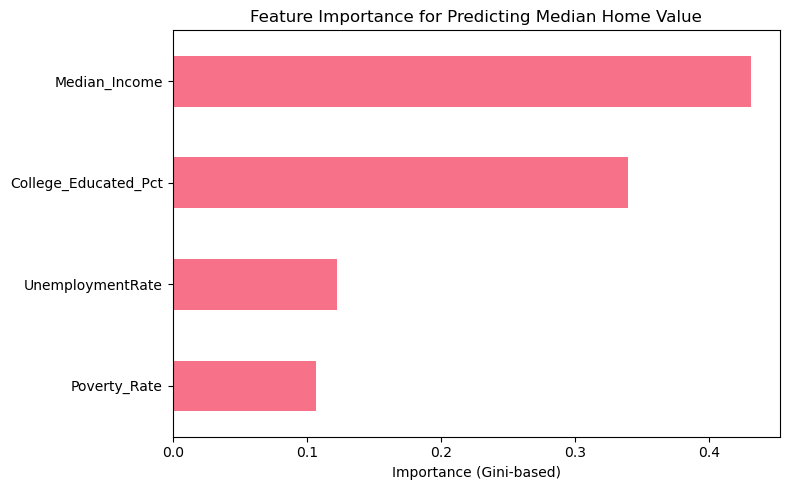


Feature importance (descending):
Median_Income           0.431038
College_Educated_Pct    0.339617
UnemploymentRate        0.122669
Poverty_Rate            0.106675
dtype: float64


In [11]:
rf_features = [
    col
    for col in ["Median_Income", "Poverty_Rate", "College_Educated_Pct", "UnemploymentRate"]
    if col in merged_data.columns
]
data_rf = merged_data.dropna(subset=["MedianHomeValue"] + rf_features).copy()
X = data_rf[rf_features]
y = data_rf["MedianHomeValue"]

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    n_jobs=-1,
)
rf.fit(X, y)

importance = pd.Series(rf.feature_importances_, index=rf_features).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
importance.plot(kind="barh")
plt.title("Feature Importance for Predicting Median Home Value")
plt.xlabel("Importance (Gini-based)")
plt.tight_layout()
plt.show()

print("\nFeature importance (descending):")
print(importance.sort_values(ascending=False))


## OUTLIER ANALYSIS

In [12]:
reg_features = [
    col
    for col in ["Median_Income", "Poverty_Rate", "College_Educated_Pct", "UnemploymentRate"]
    if col in merged_data.columns
]
data_reg = merged_data.dropna(subset=["MedianHomeValue"] + reg_features).copy()
X = data_reg[reg_features]
y = data_reg["MedianHomeValue"]

linreg = LinearRegression()
linreg.fit(X, y)

data_reg["PredictedHomeValue"] = linreg.predict(X)
data_reg["Residual"] = data_reg["MedianHomeValue"] - data_reg["PredictedHomeValue"]

top_overpriced = data_reg.nlargest(10, "Residual")
top_underpriced = data_reg.nsmallest(10, "Residual")

print("Top 10 counties where actual home values are HIGHER than predicted:")
print(top_overpriced[["County", "State", "MedianHomeValue", "PredictedHomeValue", "Residual"]])

print("\nTop 10 counties where actual home values are LOWER than predicted:")
print(top_underpriced[["County", "State", "MedianHomeValue", "PredictedHomeValue", "Residual"]])



Top 10 counties where actual home values are HIGHER than predicted:
                 County State  MedianHomeValue  PredictedHomeValue  \
2160   Nantucket County    MA     2.820770e+06       829598.567288   
1935      Pitkin County    CO     2.232793e+06       610412.303651   
1655       Teton County    WY     1.946487e+06       652240.847513   
2557  San Miguel County    CO     1.593451e+06       496411.055569   
1798       Dukes County    MA     1.404393e+06       514637.564288   
82     San Mateo County    CA     1.514607e+06       820700.639817   
20      New York County    NY     1.345862e+06       690986.246403   
261        Marin County    CA     1.439515e+06       834796.376888   
683       Monroe County    FL     9.762640e+05       373439.043502   
398         Maui County    HI     1.015700e+06       429986.438420   

          Residual  
2160  1.991171e+06  
1935  1.622381e+06  
1655  1.294246e+06  
2557  1.097040e+06  
1798  8.897554e+05  
82    6.939060e+05  
20    6.548757

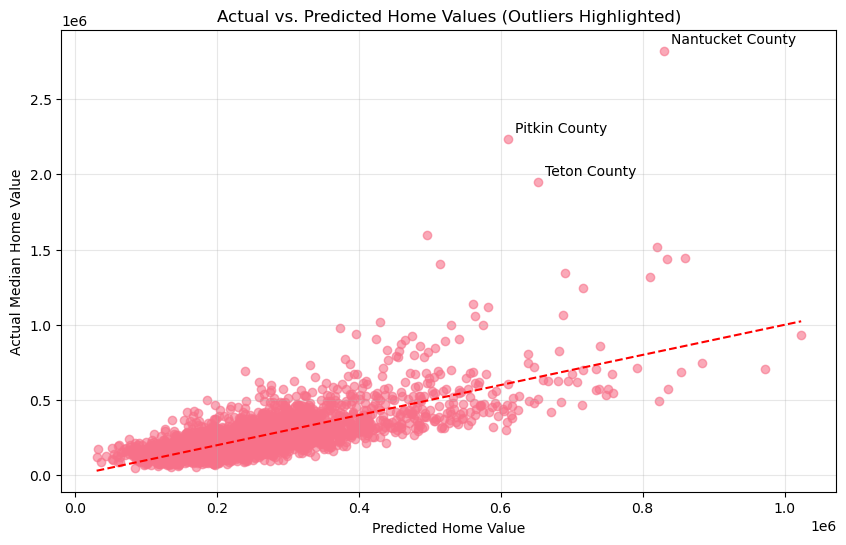

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data_reg['PredictedHomeValue'], data_reg['MedianHomeValue'], alpha=0.6)
plt.plot([data_reg['PredictedHomeValue'].min(), data_reg['PredictedHomeValue'].max()],
         [data_reg['PredictedHomeValue'].min(), data_reg['PredictedHomeValue'].max()], 'r--')
plt.xlabel('Predicted Home Value')
plt.ylabel('Actual Median Home Value')
plt.title('Actual vs. Predicted Home Values (Outliers Highlighted)')

top3 = data_reg.nlargest(3, 'Residual')
for i, row in top3.iterrows():
    plt.annotate(row['County'], (row['PredictedHomeValue'], row['MedianHomeValue']),
                 xytext=(5, 5), textcoords='offset points')
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
merged_data_clustered.loc[merged_data_clustered["County"] == "Los Angeles County",
                          ["County", "State", "Cluster"]]

County State  Cluster
0  Los Angeles County    CA        2